Let's select $Z \rightarrow \mu\mu$ candidates from the 2011 DoubleMu dataset. 

For now, some simple selections:
* Both muons are "global" muons
* Both muons are of opposite sign
* 60 < $M_{\mu\mu} < 120$ GeV

In [2]:
import csv
import math
import numpy

invariant_mass = []

with open('./data/Zmumu_Run2011A.csv') as csvfile:
    
    reader = csv.DictReader(csvfile)
   
    for row in reader:
    
        M = float(row['M'])
        invariant_mass.append(M)
        
M_hist = numpy.histogram(invariant_mass, bins=120, range=(60,120))

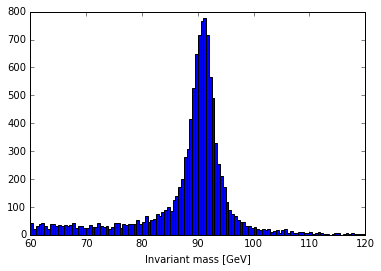

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Invariant mass [GeV]')
plt.show()


In [4]:
len(invariant_mass)

10851